# <font color=blue>Assignments for "Imbalanced Data"</font>

Using the [dataset](https://sci2s.ugr.es/keel/dataset/data/imbalanced/cleveland-0_vs_4.zip) for the [risk of heart attack](https://sci2s.ugr.es/keel/dataset.php?cod=980) with class imbalance:

1. Create a logistic regression model and measure the performance of it.
2. By experimenting with different methods and class ratios; overcome class imbalance, determine the best performing method and class ratio.

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import seaborn as sns
import scipy.stats as stats
from statistics import mean 
from scipy.stats.mstats import winsorize

import warnings



warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None


In [110]:
df = pd.read_csv('data/cleveland-0_vs_4.dat',skiprows = 18,error_bad_lines=False)
df.columns =['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'] 


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       176 non-null    float64
 1   sex       176 non-null    float64
 2   cp        176 non-null    float64
 3   trestbps  176 non-null    float64
 4   chol      176 non-null    float64
 5   fbs       176 non-null    float64
 6   restecg   176 non-null    float64
 7   thalach   176 non-null    float64
 8   exang     176 non-null    float64
 9   oldpeak   176 non-null    float64
 10  slope     176 non-null    float64
 11  ca        176 non-null    object 
 12  thal      176 non-null    object 
 13  num       176 non-null    object 
dtypes: float64(11), object(3)
memory usage: 19.4+ KB


In [112]:
df.ca.unique()

array(['0.0', '2.0', '1.0', '3.0', '<null>'], dtype=object)

In [113]:
df["ca"]=df.ca.replace({'<null>':0})

In [114]:
df["thal"]=df.thal.replace({'<null>':0})

In [115]:
df["thal"]=df["thal"].astype(object).astype(float)

In [116]:
df["ca"]=df["ca"].astype(object).astype(float)

In [117]:
df["num"]=df.num.replace({'negative':False, "positive":True})

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       176 non-null    float64
 1   sex       176 non-null    float64
 2   cp        176 non-null    float64
 3   trestbps  176 non-null    float64
 4   chol      176 non-null    float64
 5   fbs       176 non-null    float64
 6   restecg   176 non-null    float64
 7   thalach   176 non-null    float64
 8   exang     176 non-null    float64
 9   oldpeak   176 non-null    float64
 10  slope     176 non-null    float64
 11  ca        176 non-null    float64
 12  thal      176 non-null    float64
 13  num       176 non-null    bool   
dtypes: bool(1), float64(13)
memory usage: 18.2 KB


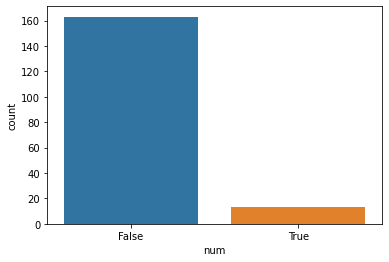

In [119]:
sns.countplot(df.num)

In [120]:
print("rate of positive heart attack : %{:.2f}".format(len(df[df["num"]==True])/len(df.num)*100))
print("rate of negative heart attack : %{:.2f}".format(len(df[df["num"]==False])/len(df.num)*100))

rate of positive heart attack : %7.39
rate of negative heart attack : %92.61


In [121]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [122]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy : {}\n".format(logreg_model.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    return  None

In [123]:
X = df.drop('num', axis=1)
y = df['num']

create_model(X,y)

Accuracy : 0.9444444444444444

Train Dataset
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       130
        True       1.00      0.70      0.82        10

    accuracy                           0.98       140
   macro avg       0.99      0.85      0.91       140
weighted avg       0.98      0.98      0.98       140

Test Dataset
              precision    recall  f1-score   support

       False       0.94      1.00      0.97        33
        True       1.00      0.33      0.50         3

    accuracy                           0.94        36
   macro avg       0.97      0.67      0.74        36
weighted avg       0.95      0.94      0.93        36



In [124]:
from sklearn.utils import resample


In [131]:
negative = df[df.num == False]
positive = df[df.num == True]

positive_upsampled = resample(positive,
                                         replace = True,
                                         n_samples = len(negative),
                                         random_state = 111)

upsampled_df = pd.concat([negative, positive_upsampled])
upsampled_df.num.value_counts()

True     163
False    163
Name: num, dtype: int64

In [132]:
X = upsampled_df.drop('num', axis=1)
y = upsampled_df['num']

create_model(X,y)

Accuracy : 1.0

Train Dataset
              precision    recall  f1-score   support

       False       1.00      0.93      0.96       130
        True       0.94      1.00      0.97       130

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Test Dataset
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        33
        True       1.00      1.00      1.00        33

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [134]:
negative_downsampled = resample(negative,
                            replace = True,
                            n_samples = len(positive),
                            random_state = 111)


downsampled_df = pd.concat([positive, negative_downsampled])
downsampled_df.num.value_counts()

True     13
False    13
Name: num, dtype: int64

In [135]:
X = downsampled_df.drop('num', axis=1)
y = downsampled_df['num']

create_model(X,y)

Accuracy : 1.0

Train Dataset
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        10
        True       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test Dataset
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         3
        True       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [136]:
from imblearn.over_sampling import SMOTE

X = df.drop('num', axis=1)
y = df['num']

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_sample(X, y)

In [137]:
create_model(X_smote, y_smote)


Accuracy : 0.9848484848484849

Train Dataset
              precision    recall  f1-score   support

       False       0.99      0.96      0.98       130
        True       0.96      0.99      0.98       130

    accuracy                           0.98       260
   macro avg       0.98      0.98      0.98       260
weighted avg       0.98      0.98      0.98       260

Test Dataset
              precision    recall  f1-score   support

       False       1.00      0.97      0.98        33
        True       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



In [138]:
from imblearn.over_sampling import ADASYN

In [139]:
ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, y)

In [140]:
create_model(X_adasyn, y_adasyn)


Accuracy : 0.9848484848484849

Train Dataset
              precision    recall  f1-score   support

       False       1.00      0.95      0.98       130
        True       0.96      1.00      0.98       132

    accuracy                           0.98       262
   macro avg       0.98      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262

Test Dataset
              precision    recall  f1-score   support

       False       1.00      0.97      0.98        33
        True       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66

